# Анализ результатов исследования.

Перед тем как приступить к анализу я переформировала весь фрейм данный в удобный формат.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cardSort.csv', sep=';')
df

,card_id,cardName,category_id,categoryName,user_id
0,1,Клипы (короткие видео),1,menu,11bfp224li7aojyk
1,2,Музыка,2,tapBar,11bfp224li7aojyk
2,3,Видео,3,hub,11bfp224li7aojyk
3,4,Сообщества,3,hub,11bfp224li7aojyk
4,5,Мессенджер,2,tapBar,11bfp224li7aojyk
...,...,...,...,...,...
413,18,Трансляции,3,hub,6ogcl24li4uzz6p
414,19,Мини-программа,3,hub,6ogcl24li4uzz6p
415,20,Сервисы,2,tapBar,6ogcl24li4uzz6p
416,21,Главная (лента новостей),2,tapBar,6ogcl24li4uzz6p


## 1. Карточки

In [3]:
#сколько раз карточку относили к категории и сколько раз
pd.crosstab(df['cardName'],
            df['categoryName'])

categoryName,hub,menu,tapBar
cardName,,,
VK NFT,12,6,1
VK Pay,9,10,0
Видео,15,2,2
Главная (лента новостей),4,1,14
Друзья,9,3,7
Закладки,6,10,3
Звонки,13,4,2
Игры (категории игр),16,3,0
Клипы (короткие видео),11,4,4


Эта же таблица была доступна в самом сервисе pathway.

In [12]:
#теперь посмотрю в процентном соотношении
#сколько раз карточку относили к категории и сколько раз
pd.crosstab(df['cardName'],
            df['categoryName'])

dfPerc = pd.crosstab(df['cardName'],
            df['categoryName'])

dfPerc /= len(df.user_id.unique())
dfPerc *= 100

In [13]:
dfPerc.head(22)

categoryName,hub,menu,tapBar
cardName,,,
VK NFT,63.157895,31.578947,5.263158
VK Pay,47.368421,52.631579,0.000000
Видео,78.947368,10.526316,10.526316
Главная (лента новостей),21.052632,5.263158,73.684211
Друзья,47.368421,15.789474,36.842105
Закладки,31.578947,52.631579,15.789474
Звонки,68.421053,21.052632,10.526316
Игры (категории игр),84.210526,15.789474,0.000000
Клипы (короткие видео),57.894737,21.052632,21.052632


Исходя из этой информации целесообразно расположить в "Сервисы" -- VK NFT, Видео, Игры, Звонки, Клипы, мини-программу(-ы), почту, рекламу, сообщества, стикер, трансляции.

В категорию "Выпадающее меню" -- VK Pay (перевес небольшой между сервисами и этой категорией, возможно следует разместить кросс-линки), закладки, настройки, управление VK ID.

В "тап-бар(нижнее меню)" -- главную (ленту новостей), мессенджер, мой профиль, музыку, сервисы.

## 2. Категории

In [14]:
df.groupby(["categoryName", "cardName"]).agg({"cardName":"count"})

cardName
categoryName cardName                            
hub          VK NFT                            12
             VK Pay                             9
             Видео                             15
             Главная (лента новостей)           4
             Друзья                             9
             Закладки                           6
             Звонки                            13
             Игры (категории игр)              16
             Клипы (короткие видео)            11
             Мини-программа                    13
             Мой профиль                        5
             Музыка                             5
             Настройки                          5
             Почта                             16
             Реклама                           11
             Сервисы                            2
             Сообщества                        14
             Стикеры (каталог стикеров)        14
             Трансляции                        13
             Управление VK ID                   5
             Файлы                             10
menu         VK NFT                             6
             VK Pay                            10
             Видео                              2
             Главная (лента новостей)           1
             Друзья                             3
             Закладки                          10
             Звонки                             4
             Игры (категории игр)               3
             Клипы (короткие видео)             4
             Мессенджер                         1
             Мини-программа                     5
             Мой профиль                        3
             Настройки                         10
             Почта                              2
             Реклама                            7
             Сервисы                            7
             Сообщества                         1
             Стикеры (каталог стикеров)         5
             Трансляции                         6
             Управление VK ID                  14
             Файлы                              9
tapBar       VK NFT                             1
             Видео                              2
             Главная (лента новостей)          14
             Друзья                             7
             Закладки                           3
             Звонки                             2
             Клипы (короткие видео)             4
             Мессенджер                        18
             Мини-программа                     1
             Мой профиль                       11
             Музыка                            14
             Настройки                          4
             Почта                              1
             Реклама                            1
             Сервисы                           10
             Сообщества                         4

## 3. Матрица совстречаемости

In [15]:
cards = set(df.card_id)
n = len(cards)
similarity = np.zeros((n,n))

In [16]:
for id in set(df.user_id):
  sim = df[df.user_id == id]
  for x in cards:
    for y in cards:
      if sim.category_id[sim.card_id == x].values[0] == sim.category_id[sim.card_id == y].values[0]:
        similarity[x-1][y-1] += 1

In [17]:
#названия карточек
namesTable = df[["card_id","cardName"]].drop_duplicates().sort_values(by = "card_id")
namesTable

,card_id,cardName
0,1,Клипы (короткие видео)
1,2,Музыка
2,3,Видео
3,4,Сообщества
4,5,Мессенджер
5,6,Закладки
6,7,Файлы
7,8,VK Pay
8,9,Настройки
9,10,Управление VK ID


In [18]:
dfsim = pd.DataFrame(similarity, index = namesTable.cardName, columns = namesTable.cardName)
dfsim /= 19
dfsim

cardName,Клипы (короткие видео),Музыка,Видео,Сообщества,Мессенджер,Закладки,Файлы,VK Pay,Настройки,Управление VK ID,...,Стикеры (каталог стикеров),Звонки,VK NFT,Реклама,Почта,Трансляции,Мини-программа,Сервисы,Главная (лента новостей),Мой профиль
cardName,,,,,,,,,,,,,,,,,,,,,
Клипы (короткие видео),1.000000,0.315789,0.473684,0.368421,0.210526,0.368421,0.263158,0.315789,0.210526,0.263158,...,0.421053,0.631579,0.421053,0.526316,0.578947,0.684211,0.684211,0.368421,0.210526,0.263158
Музыка,0.315789,1.000000,0.263158,0.368421,0.684211,0.210526,0.157895,0.105263,0.157895,0.000000,...,0.263158,0.368421,0.157895,0.052632,0.263158,0.210526,0.263158,0.368421,0.473684,0.526316
Видео,0.473684,0.263158,1.000000,0.684211,0.157895,0.263158,0.421053,0.315789,0.263158,0.263158,...,0.631579,0.578947,0.473684,0.421053,0.631579,0.578947,0.578947,0.315789,0.368421,0.157895
Сообщества,0.368421,0.368421,0.684211,1.000000,0.263158,0.368421,0.526316,0.315789,0.263158,0.157895,...,0.631579,0.578947,0.368421,0.315789,0.578947,0.526316,0.526316,0.157895,0.368421,0.421053
Мессенджер,0.210526,0.684211,0.157895,0.263158,1.000000,0.105263,0.052632,0.000000,0.157895,0.052632,...,0.052632,0.105263,0.052632,0.052632,0.052632,0.000000,0.052632,0.578947,0.684211,0.526316
Закладки,0.368421,0.210526,0.263158,0.368421,0.105263,1.000000,0.578947,0.421053,0.578947,0.526316,...,0.368421,0.368421,0.473684,0.315789,0.368421,0.421053,0.368421,0.210526,0.210526,0.263158
Файлы,0.263158,0.157895,0.421053,0.526316,0.052632,0.578947,1.000000,0.421053,0.526316,0.421053,...,0.578947,0.473684,0.473684,0.368421,0.526316,0.421053,0.473684,0.263158,0.105263,0.210526
VK Pay,0.315789,0.105263,0.315789,0.315789,0.000000,0.421053,0.421053,1.000000,0.315789,0.578947,...,0.421053,0.263158,0.578947,0.421053,0.421053,0.368421,0.421053,0.210526,0.105263,0.157895
Настройки,0.210526,0.157895,0.263158,0.263158,0.157895,0.578947,0.526316,0.315789,1.000000,0.368421,...,0.263158,0.368421,0.157895,0.368421,0.368421,0.315789,0.263158,0.210526,0.210526,0.368421


In [21]:
dfsim

cardName,Клипы (короткие видео),Музыка,Видео,Сообщества,Мессенджер,Закладки,Файлы,VK Pay,Настройки,Управление VK ID,...,Стикеры (каталог стикеров),Звонки,VK NFT,Реклама,Почта,Трансляции,Мини-программа,Сервисы,Главная (лента новостей),Мой профиль
cardName,,,,,,,,,,,,,,,,,,,,,
Клипы (короткие видео),1.000000,0.315789,0.473684,0.368421,0.210526,0.368421,0.263158,0.315789,0.210526,0.263158,...,0.421053,0.631579,0.421053,0.526316,0.578947,0.684211,0.684211,0.368421,0.210526,0.263158
Музыка,0.315789,1.000000,0.263158,0.368421,0.684211,0.210526,0.157895,0.105263,0.157895,0.000000,...,0.263158,0.368421,0.157895,0.052632,0.263158,0.210526,0.263158,0.368421,0.473684,0.526316
Видео,0.473684,0.263158,1.000000,0.684211,0.157895,0.263158,0.421053,0.315789,0.263158,0.263158,...,0.631579,0.578947,0.473684,0.421053,0.631579,0.578947,0.578947,0.315789,0.368421,0.157895
Сообщества,0.368421,0.368421,0.684211,1.000000,0.263158,0.368421,0.526316,0.315789,0.263158,0.157895,...,0.631579,0.578947,0.368421,0.315789,0.578947,0.526316,0.526316,0.157895,0.368421,0.421053
Мессенджер,0.210526,0.684211,0.157895,0.263158,1.000000,0.105263,0.052632,0.000000,0.157895,0.052632,...,0.052632,0.105263,0.052632,0.052632,0.052632,0.000000,0.052632,0.578947,0.684211,0.526316
Закладки,0.368421,0.210526,0.263158,0.368421,0.105263,1.000000,0.578947,0.421053,0.578947,0.526316,...,0.368421,0.368421,0.473684,0.315789,0.368421,0.421053,0.368421,0.210526,0.210526,0.263158
Файлы,0.263158,0.157895,0.421053,0.526316,0.052632,0.578947,1.000000,0.421053,0.526316,0.421053,...,0.578947,0.473684,0.473684,0.368421,0.526316,0.421053,0.473684,0.263158,0.105263,0.210526
VK Pay,0.315789,0.105263,0.315789,0.315789,0.000000,0.421053,0.421053,1.000000,0.315789,0.578947,...,0.421053,0.263158,0.578947,0.421053,0.421053,0.368421,0.421053,0.210526,0.105263,0.157895
Настройки,0.210526,0.157895,0.263158,0.263158,0.157895,0.578947,0.526316,0.315789,1.000000,0.368421,...,0.263158,0.368421,0.157895,0.368421,0.368421,0.315789,0.263158,0.210526,0.210526,0.368421


## 4. Кластеризация

In [19]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

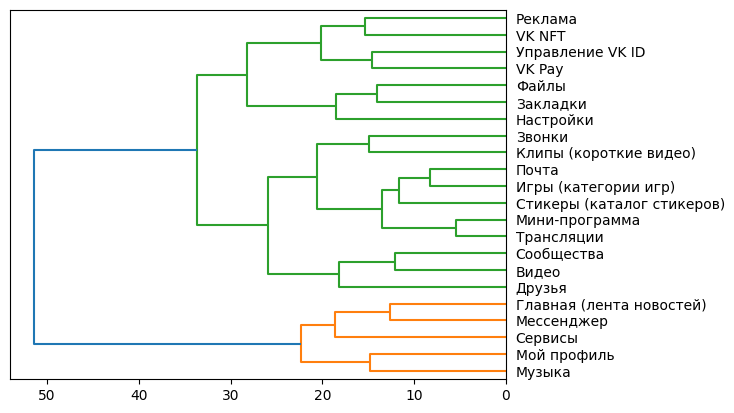

In [20]:
Z = hierarchy.linkage(similarity, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z, 
                          orientation = "left", 
                          labels = namesTable.cardName.values)
plt.show()

В данном методе четко выражена категория "тап-бар(нижнее меню)" , и по мнению респондентов туда следует поместить главную (ленту новостей), мессенджер, мой профиль, музыку, сервисы.

## Итоги

Перед респондентами стояла задача расположить функциональности в те группы, где они хотели бы их видеть.

В текущей версии ВК в всплывающем меню находятся закладки, файлы, VK Pay, настройки, управление VK ID. Однако, согласно данным, которые были получены при помощи метода закрытой карточной сортировки респонденты желали бы видеть в этой категории VK Pay (перевес небольшой между сервисами и этой категорией, возможно следует разместить кросс-линки), закладки, настройки, управление VK ID. Файлы и закладки они разместили бы ближе.

Можно предположить, что в эту категорию респонденты помещали карточки с функциональностями, которые они используют реже всего. Интересным был тот факт, что в текущей версии ВК клипы находятся в тап-баре, однако респонденты поместили эту функциональность в "Сервисы", и в равном соотношении в "Выпадающее меню" и "Тап-бар" -- эти категории получили по 21%. Это может свидетельствовать о том, что у каждого респондента разные потребности и разные пожелания к навигации в сервисе.

В текущей версии ВК в тап-баре находятся главная, сервисы, мессенджер, клипы и видео. Однако, участники исследования желали бы видеть там немного другие функциональности и вкладки. Совпадают главная, мессенджер и сервисы. Вместо клипов и видео, они бы хотели разместить в этом навигационном блоке музыку и вкладку мой профиль(моя страница). 

Участники исследования точно не хотели бы размещать мессенджер в сервисы; Музыку в выпадающее меню; VK Pay, игры (каталог игр), стикеры (каталог стикеров), трансляции, управление VK ID и файлы в тап-бар. Эти карточки получили по 0% в данной категории.

Наибольшее процентное соотношение карточки в определенной категории получила карточка "Мессенджер", 94,7% респондентов поместили эту функциональность в тап-бар или нижнее навигационно меню.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=481b9c4a-381e-4faf-a2a9-9dc5b3a21d1b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>